In [67]:
import numpy as np
import pandas as pd
import gzip
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
facebook_path = 'data/facebook.tar.gz'
facebook_combined_path = 'data/facebook_combined.txt.gz'

## Load Data

In [75]:
with gzip.open(facebook_path, 'rt') as gz_file:
    # Read the contents of the file
    text = gz_file.read()


In [76]:
text

'facebook/\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x000000775\x000004070\x000004070\x0000000000000\x0012057014464\x00012156\x00 5\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00ustar  \x00julian\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00julian\x00\x00\x00\x00\x00\x00

In [69]:
with gzip.open(facebook_combined_path, 'rt') as gz_file:
    # Read the contents of the file
    text = gz_file.read()


connections = []
from_list = []
to_list = []
# The last is just an empty new line
for row in text.split('\n')[:-1]:
    a, b = [int(x) for x in row.split(' ')]
    connections.append((a, b))

    from_list.append(a)
    to_list.append(b)

In [70]:
ids = set(from_list).union(set(to_list))

In [71]:
print(f'Smallest id: {min(ids)}')
print(f'Biggest id: {max(ids)}')
print(f'Count of ids: {len(ids)}')

Smallest id: 0
Biggest id: 4038
Count of ids: 4039


In [72]:
A = np.zeros((len(ids), len(ids)))

In [73]:
for elem in connections:
    A[elem[0], elem[1]] = 1

## EDA

In [74]:
import numpy as np

# Check if the matrix is symmetric
is_symmetric = np.allclose(A, A.T)

if is_symmetric:
    print("The matrix is symmetric.")
else:
    print("The matrix is not symmetric.")

The matrix is not symmetric.


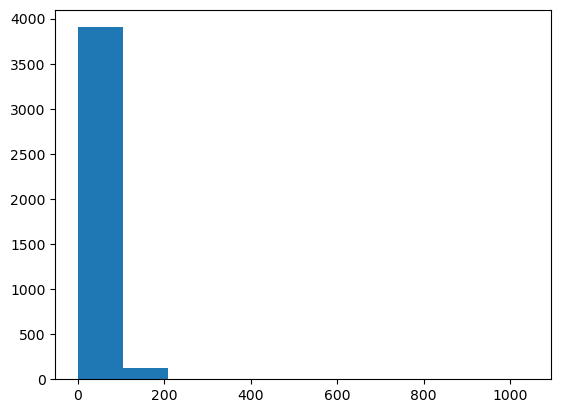

In [64]:
# Emberek eloszlása, akiket
plt.hist(A.sum(axis = 1));

(array([2.959e+03, 6.170e+02, 2.090e+02, 1.230e+02, 6.600e+01, 3.000e+01,
        1.800e+01, 1.400e+01, 1.000e+00, 2.000e+00]),
 array([  0. ,  25.1,  50.2,  75.3, 100.4, 125.5, 150.6, 175.7, 200.8,
        225.9, 251. ]),
 <BarContainer object of 10 artists>)

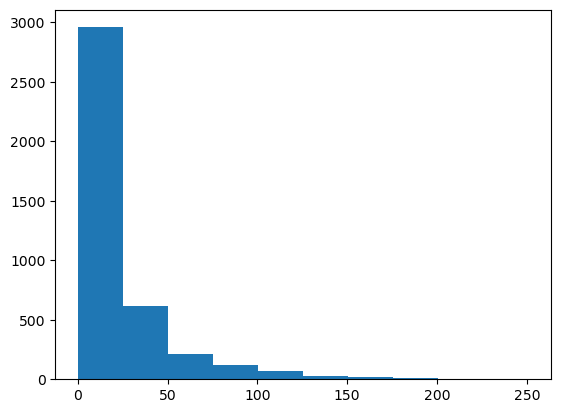

In [63]:
plt.hist(A.sum(axis =0))

The matrix is symmetric.
